In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model, metrics


import matplotlib as mpl

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

from sklearn.model_selection import train_test_split

### Utility Functions

In [26]:
def get_data_path(data_name="none", 
                  data_file_name="project_dataset.csv"):
    """  Gets the data path, specific to the project configuration.
    
    :return path to data
    """
    
    proj_dirs = os.getcwd().split("code")
    data_dir = os.path.join(proj_dirs[0], "data")
    data_path = os.path.join(data_dir,data_file_name)
    
    return data_path
# Sample a given number of points from the provided dataset with replacement. seed for repeatability
def get_dataFrame_sample(subset_size, df, seed):
    return df.sample(n=subset_size, random_state=seed, replace=True)

# Sample a given number of points from the provided dataset. seed for repeatability
def get_dataFrame_subset(subset_size, df, seed):
    return df.sample(n=subset_size, random_state=seed)

### Pre-processing

In [27]:
file_name = get_data_path()
# usecols=['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Flow Bytes/s', 'Label']
original_df = pd.read_csv(file_name, sep=',', encoding='utf-8', usecols=[' Flow Duration', 
                ' Total Fwd Packets', ' Total Backward Packets', 'Flow Bytes/s', ' Label'])
# Remove leading/trailing whitespace

display(original_df.head())
display(original_df.describe())

,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Label
0,113095465,48,24,174.0122825,BENIGN
1,113473706,68,40,212.2253767,BENIGN
2,119945515,150,0,0,BENIGN
3,60261928,9,7,108.7087688,BENIGN
4,269,2,2,1576208.178,BENIGN


,Flow Duration,Total Fwd Packets,Total Backward Packets
count,1.703660e+05,170366.000000,170366.000000
mean,1.246354e+07,15.124620,18.022276
std,3.193852e+07,1123.107756,1494.492871
min,-1.000000e+00,1.000000,0.000000
25%,1.920000e+02,1.000000,1.000000
50%,3.141200e+04,2.000000,2.000000
75%,8.169818e+05,4.000000,2.000000
max,1.200000e+08,200755.000000,270686.000000


### Data Distribution

In [28]:
benign = 'BENIGN'
benign_df = original_df[original_df[' Label'] == benign]

# Get number of malicious entries
malicious_df = original_df[original_df[' Label'] != benign]
display(malicious_df.head())
display(malicious_df.describe())
"""
#Perform Class sampling with replacement to increase malicious sample size from 2000 to 10000 
malicious_df_resampled = get_dataFrame_sample(10000, malicious_df, 1)
display(malicious_df_resampled.head())
display(malicious_df_resampled.describe())
"""
# Reduce number of samples for benign class
benign_df_reduced = get_dataFrame_subset(50000, benign_df, 1)


display(benign_df_reduced.head())
display(benign_df_reduced.describe())

,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Label
12637,5185118,7,7,644.7297824,Web Attack ?Brute Force
12643,5057374,10,7,2099.113097,Web Attack ?Brute Force
12700,81,1,1,0,Web Attack ?Brute Force
12712,5271123,7,5,455.1212332,Web Attack ?Brute Force
12791,5020638,7,4,478.6244298,Web Attack ?Brute Force


,Flow Duration,Total Fwd Packets,Total Backward Packets
count,2.180000e+03,2180.000000,2180.000000
mean,6.533719e+06,10.945413,5.281193
std,7.492580e+06,39.124039,20.156303
min,4.000000e+00,1.000000,0.000000
25%,5.177226e+06,3.000000,1.000000
50%,5.476074e+06,3.000000,1.000000
75%,5.783897e+06,3.000000,1.000000
max,7.020306e+07,212.000000,114.000000


,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Label
163317,2,2,0,1.04E+09,BENIGN
9988,51367,1,1,233.61302,BENIGN
58239,30819,1,1,3893.701937,BENIGN
4940,5957135,3,1,2.014391146,BENIGN
163272,169,2,2,1408284.024,BENIGN


,Flow Duration,Total Fwd Packets,Total Backward Packets
count,5.000000e+04,50000.000000,50000.000000
mean,1.244384e+07,10.284740,11.065360
std,3.194552e+07,704.772366,817.582473
min,-1.000000e+00,1.000000,0.000000
25%,1.910000e+02,1.000000,1.000000
50%,3.114800e+04,2.000000,2.000000
75%,4.726235e+05,4.000000,2.000000
max,1.200000e+08,155812.000000,179415.000000


In [31]:
actual_data = pd.concat([benign_df, malicious_df]).dropna()
actual_y = actual_data[' Label']
actual_data = actual_data.drop([' Label'], axis=1)
# Train Test Split
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(actual_data, actual_y, test_size=test_ratio)


In [46]:
X_train = pd.DataFrame(X_train)
scatter_df = pd.concat([X_train, y_train]).dropna()


,0,Flow Duration,Total Backward Packets,Total Fwd Packets,Flow Bytes/s


### Scatterplots of Data Distributions

KeyError: ' Label'

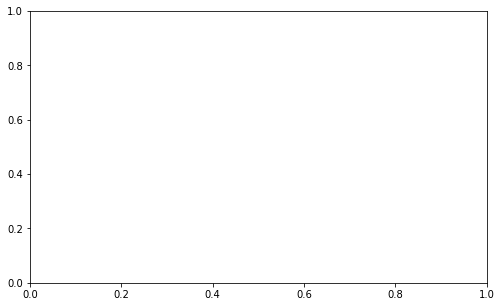

In [33]:
# Code for plotting scatter plot of data. Code modified from ISLR Chapter 4 lab code on github
fig1 = plt.figure(figsize=(18,5))
gs = mpl.gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0,0])
ax1.scatter(scatter_df[scatter_df[' Label']!=benign][' Flow Duration'], scatter_df[scatter_df[' Label']!=benign]['Flow Bytes/s'], 
            c='red', marker='+', linewidths=1)
ax1.scatter(scatter_df[scatter_df[' Label']==benign][' Flow Duration'], scatter_df[scatter_df[' Label']==benign]['Flow Bytes/s'], 
            c='blue', marker='o', linewidths=1, edgecolors='lightblue', facecolors='white', alpha=.9)
ax1.set_ylabel('Flow Duration')
ax1.set_xlabel('Flow Bytes/s')
ax1.set_title('Scatterplot of Flow Duration and Flow bytes/s')

ax2 = plt.subplot(gs[0,1])
ax2.scatter(scatter_df[scatter_df[' Label']!=benign][' Total Backward Packets'], scatter_df[scatter_df[' Label']!=benign][' Total Fwd Packets'], 
            c='red', marker='+', linewidths=1)
ax2.scatter(scatter_df[scatter_df[' Label']==benign][' Total Backward Packets'], scatter_df[scatter_df[' Label']==benign][' Total Fwd Packets'], 
             c='blue', marker='o', linewidths=1, edgecolors='lightblue', facecolors='white', alpha=.9)
ax2.set_ylabel('Total Backward Packets')
ax2.set_xlabel('Total Forward Packets')
ax2.set_title('Scatterplot of Total Backward Packets and Total Forward Packets')